<a href="https://colab.research.google.com/github/valanm22/Miscellaneous/blob/main/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [ ]:
#Transforming images into tensors
transform = transforms.ToTensor()

train = datasets.MNIST(root='./data', train=True, download=True,
                                transform=transform)

test = datasets.MNIST(root='./data',  train=False, download=True,
                               transform=transform)

In [ ]:
#Creating dataloaders
train_loader = torch.utils.data.DataLoader(train, batch_size=64)
test_loader = torch.utils.data.DataLoader(test, batch_size=64)

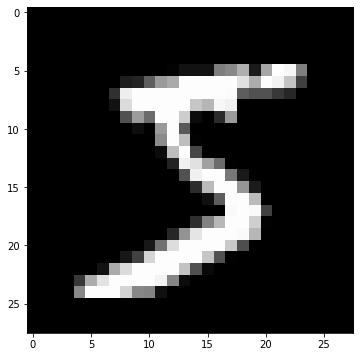

In [ ]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

img = np.squeeze(images[0])

fig = plt.figure(figsize = (6,6)) 
fig.show
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')

In [ ]:
class Net(nn.Module):

  def __init__(self):
    super(Net, self).__init__()

    #Encoder

    #Conv layer 1 with a filter size of 3x3
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
    #Pooling layer 1
    self.pool1 = nn.MaxPool2d(2, 2)

    #Conv layer 2 with a filter size of 3x3
    self.conv2 = nn.Conv2d(32, 32, 3, padding=1)
    #Pooling layer 2
    self.pool2 = nn.MaxPool2d(2, 2)
    
    #Decoder
    self.t_conv1 = nn.ConvTranspose2d(in_channels=32, out_channels=32, kernel_size=2, stride=2)
    self.t_conv2 = nn.ConvTranspose2d(32, 1, 2, stride=2)


  def forward(self, x):
      #Activation
      x = F.relu(self.conv1(x))
      x = self.pool1(x)
      
      x = F.relu(self.conv2(x))
      x = self.pool2(x)

      x = F.relu(self.t_conv1(x))
      x = torch.sigmoid(self.t_conv2(x))
            
      return x


In [ ]:
model = Net()
model

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (t_conv1): ConvTranspose2d(32, 32, kernel_size=(2, 2), stride=(2, 2))
  (t_conv2): ConvTranspose2d(32, 1, kernel_size=(2, 2), stride=(2, 2))
)

In [ ]:
cost_function = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

In [17]:
for epoch in range(30):

  train_loss = 0.0

  for data in train_loader:
      images, labels = data
      
      output = model(images)
      cost = cost_function(output, images)

      optimizer.zero_grad()
      cost.backward()
      optimizer.step()

      train_loss += cost.item()*images.size(0)
          
  train_loss = train_loss/len(train_loader)
  print('Epoch[{}/{}], loss: {:.6f}'
        .format(epoch + 1, 30, train_loss))

Epoch[1/30], loss: 0.544137
Epoch[2/30], loss: 0.196663
Epoch[3/30], loss: 0.173150
Epoch[4/30], loss: 0.161431
Epoch[5/30], loss: 0.153989
Epoch[6/30], loss: 0.148499
Epoch[7/30], loss: 0.144147
Epoch[8/30], loss: 0.140516
Epoch[9/30], loss: 0.137985
Epoch[10/30], loss: 0.135900
Epoch[11/30], loss: 0.134017
Epoch[12/30], loss: 0.132424
Epoch[13/30], loss: 0.130915
Epoch[14/30], loss: 0.129697
Epoch[15/30], loss: 0.128695
Epoch[16/30], loss: 0.127697
Epoch[17/30], loss: 0.126772
Epoch[18/30], loss: 0.126021
Epoch[19/30], loss: 0.125232
Epoch[20/30], loss: 0.124453
Epoch[21/30], loss: 0.123806
Epoch[22/30], loss: 0.123150
Epoch[23/30], loss: 0.122507
Epoch[24/30], loss: 0.121993
Epoch[25/30], loss: 0.121413
Epoch[26/30], loss: 0.120869
Epoch[27/30], loss: 0.120339
Epoch[28/30], loss: 0.119898
Epoch[29/30], loss: 0.119415
Epoch[30/30], loss: 0.118990


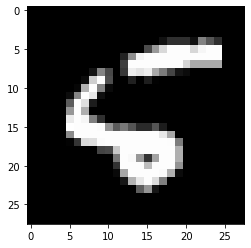

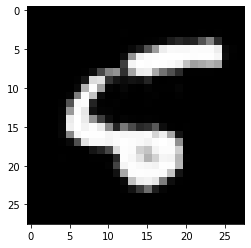

In [19]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

output = model(images)
images = images.numpy()

output = output.view(64, 1, 28, 28)
output = output.detach().numpy()

fig, ax = plt.subplots()
ax.imshow(np.squeeze(images[8]), cmap='gray')

fig, ax = plt.subplots()
ax.imshow(np.squeeze(output[8]), cmap='gray')